In [6]:
import numpy as np
import TMQGP as tm
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad
import tqdm

In [7]:
omrange = np.linspace(-2,2, 200)
m1 = 0.325
lambda4 = 2*np.sqrt(0.651**2 + m1**2)

## Analytic Solution for polarization operator

In [8]:
#Fixed Inputs parameters
a0=6.75
a1=-1.95
a2=2.625
a3=-7.44
b3=0.75
b4=7.5
T0=0.27 #GeV #Critical point in purely gluonic field
Nf=3 #Number of quark flavor
G=10.08 #(GeV)^2
m0=5.5/1000 #MeV Current quark mass
m1=500/1000 #MeV Constituent quark mass
 #Change it afterwards
Nc=2 #May change afterwards
Λ=0.651 #Cutoff Momentum 

#Fermi Dirac distribution function
def f(E,β):
    return 1/(1+np.exp(β*E))


#Imaginary part of pion polarization operator 
def ImP(ω,u,T,m=0.325): #made m as argument,where if I don't put the value of m while calling the function, it will be assumed as 0.325  
    β=1/T
    if ω==0:
        return 0
   #res=Nc*Nf*ω**2/8*np.pi
    #res*=(1-4*m1**2/ω**2)**0.5
    return np.nan_to_num((np.sign(ω)*Nc*Nf*ω*(((ω**2-(2*m)**2))**0.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*np.pi))
#
#Getting the real part using Kramer Kronig's rules
def ReP(ω,u,T,m=0.325):
    f= lambda ω0:(ImP(ω0,0,T,m)/np.pi)
    return quad(f,-10,10,weight='cauchy',wvar=ω)[0]

def ImS(ω,u,T,m=0.325):
    β=1/T
    if ω==0:
        return 0
    return np.nan_to_num((np.sign(ω)*Nc*Nf*((ω**2 - (2*m)**2)**1.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*ω*np.pi))


def ReS(ω,u,T,m=0.325):
    f= lambda ω0:(ImS(ω0,0,T,m)/np.pi)
    return quad(f,-10,10,weight='cauchy',wvar=ω)[0]

In [9]:
Impp=[ImP(s,0,0.001) for s in omrange]
Impp = np.array(Impp)

/tmp/ipykernel_730555/1260825283.py:29: RuntimeWarning: invalid value encountered in scalar power
  return np.nan_to_num((np.sign(ω)*Nc*Nf*ω*(((ω**2-(2*m)**2))**0.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*np.pi))
/tmp/ipykernel_730555/1260825283.py:19: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(β*E))


In [10]:
Imss=[ImS(s,0,0.001) for s in omrange]
Imss = np.array(Imss)

/tmp/ipykernel_730555/1260825283.py:40: RuntimeWarning: invalid value encountered in scalar power
  return np.nan_to_num((np.sign(ω)*Nc*Nf*((ω**2 - (2*m)**2)**1.5)*(1-f(ω/2-u,β)-f(ω/2+u,β))*np.heaviside((ω**2)-(2*m)**2,0.5)*np.heaviside(4*(Λ**2 + m**2)-ω**2,0.5))/(8*ω*np.pi))
/tmp/ipykernel_730555/1260825283.py:19: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(β*E))


In [11]:
Repp=[ReP(s,0,0.05) for s in omrange]
Repp = np.array(Repp)

/tmp/ipykernel_730555/1260825283.py:34: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f,-10,10,weight='cauchy',wvar=ω)[0]


In [12]:
Ress = [ReS(s,0,0.001) for s in omrange]
Ress = np.array(Ress)

/tmp/ipykernel_730555/1260825283.py:19: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(β*E))
/tmp/ipykernel_730555/1260825283.py:45: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(f,-10,10,weight='cauchy',wvar=ω)[0]


# Hatsuda Integral Calculations : 6.31

$$Tr \int \frac{d^4 p}{(2\pi)^4} tanh(\frac{p^0}{2T})\Gamma_\alpha \left[G_0^R(p^0 + \omega, p + q)\Gamma_\alpha Im G_0^R(p^0, p) + Im G_0^R(p^0, p)\Gamma_\alpha G_0^R(p^0 - \omega, p - q)  \right] $$

Solving this, we get an integral of the form 

$$ \int \frac{dp dp_0 4*4*p^2(4m^2 - 4p_0^2 - 4p^2)}{(2\pi)^3} tanh(\frac{p^0}{2T})  $$

In [13]:
Fp_array = [tm.F_p(i, 0, 0.001, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)]

/tmp/ipykernel_730555/900299313.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  Fp_array = [tm.F_p(i, 0, 0.001, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)]


  0%|          | 0/200 [00:00<?, ?it/s]

In [14]:
Fp_array = np.array(Fp_array)

(0.0, 3.0)

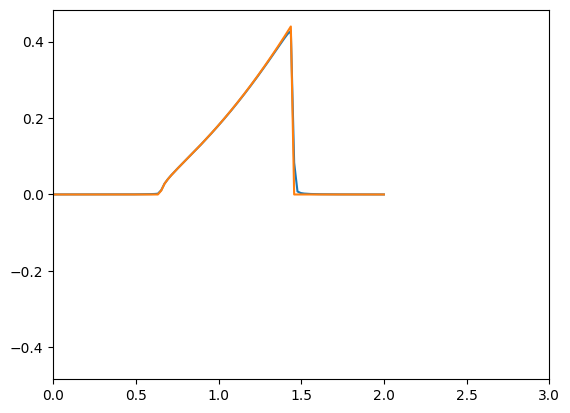

In [15]:
plt. plot(omrange, Fp_array)
plt.plot(omrange, Impp)
plt.xlim(0,3)

In [16]:
#double F(double omega,double q,double T,double m,double eps)
Fs_array = np.array([tm.F_s(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_730555/4294221021.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  Fs_array = np.array([tm.F_s(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

In [17]:
Fs_array = np.array(Fs_array)

In [18]:
iIm = tm.Interpolator(omrange,  np.ascontiguousarray(Fp_array), 'cubic')

In [19]:
Real_array = np.array([tm.Re_meson(i,lambda4, iIm) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_730555/2734502653.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  Real_array = np.array([tm.Re_meson(i,lambda4, iIm) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

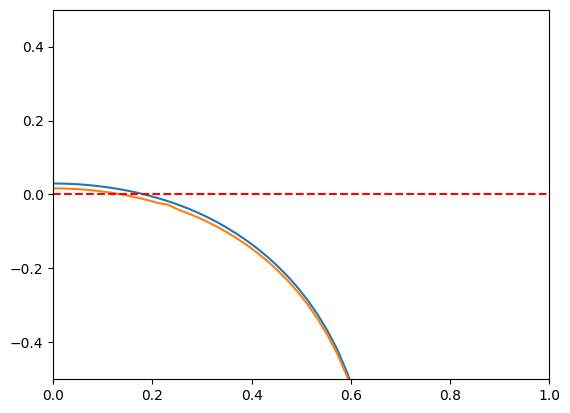

In [20]:
plt.plot(omrange, 1 - G* Real_array)
plt.plot(omrange, 1 - G*Repp)
plt.ylim(-0.5, 0.5)
plt.xlim(0,1)
plt.axhline(0, color='red', linestyle='--')


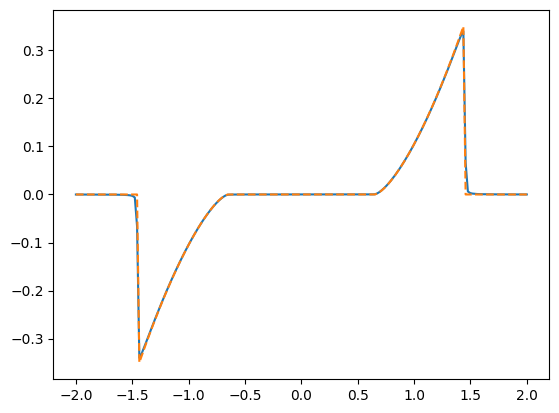

In [21]:
plt. plot(omrange, -Fs_array)
plt.plot(omrange, Imss, ls = '--')
#plt.xlim(0, 2)
#plt.ylim(0,0.2)

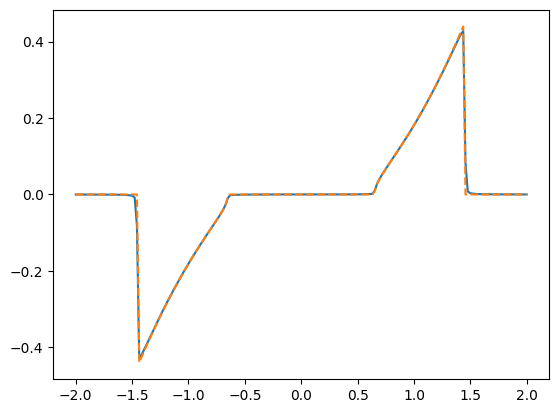

In [22]:
#plt.plot(omrange, -Fs_array)
plt.plot(omrange, Fp_array)
plt.plot(omrange, Impp, ls = '--')
#plt.plot(omrange, Imss)

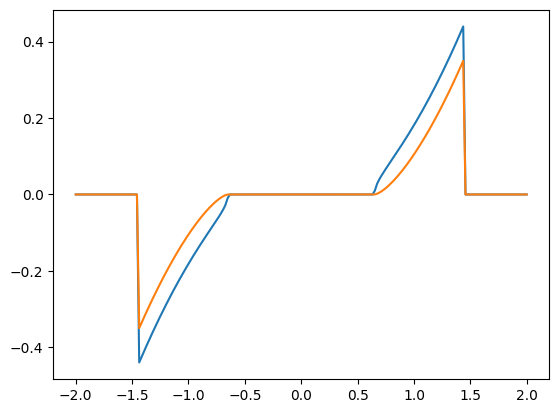

In [23]:
plt.plot(omrange, Impp)
plt.plot(omrange, Imss)

# Increasing eps plots

In [ ]:
##double F(double omega,double q,double T,double m,double eps)

In [4]:
omrange1= np.linspace(0, 0.4, 150)

In [27]:
F_array_1 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_523366/362997221.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  F_array_1 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

In [28]:
F_array_2 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.01) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_523366/3899067796.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  F_array_2 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.01) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

In [24]:
F_array_3 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.05) for i in tqdm.tqdm_notebook(omrange)])

/tmp/ipykernel_730555/2772931371.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  F_array_3 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.05) for i in tqdm.tqdm_notebook(omrange)])


  0%|          | 0/200 [00:00<?, ?it/s]

In [ ]:
#F_array_1 = np.array([tm.F_p(i, 0, 0.05, 0.325, 0.001) for i in tqdm.tqdm_notebook(omrange)])

In [30]:
iIm_1 = tm.Interpolator(omrange,  np.ascontiguousarray(F_array_1), 'cubic')

In [31]:
iIm_2 = tm.Interpolator(omrange,  np.ascontiguousarray(F_array_2), 'cubic')

In [25]:
iIm_3 = tm.Interpolator(omrange,  np.ascontiguousarray(F_array_3), 'cubic')

In [33]:
Real_array_1 = np.array([tm.Re_meson(i,lambda4, iIm_1) for i in omrange1])

In [34]:
Real_array_2 = np.array([tm.Re_meson(i,lambda4, iIm_2) for i in omrange1])

In [26]:
Real_array_3 = np.array([tm.Re_meson(i,lambda4, iIm_3) for i in omrange])

In [27]:
plt.plot(omrange, F_array_1)

NameError: name 'F_array_1' is not defined

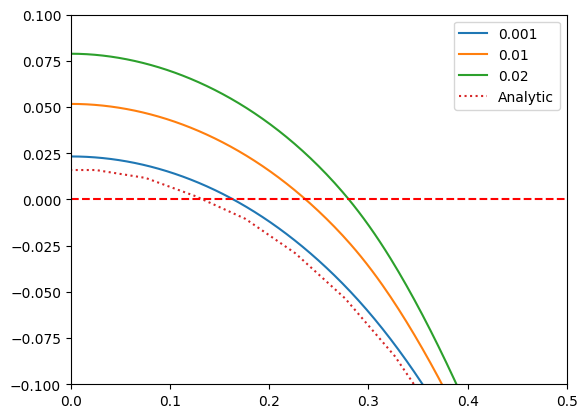

In [41]:
plt.plot(omrange1,1 - G* Real_array_1, label = '0.001')
plt.plot(omrange1,1 - G* Real_array_2, label = '0.01')
plt.plot(omrange1,1 - G* Real_array_3, label = '0.02')
plt.plot(omrange, 1 - G* Repp, label = 'Analytic', ls = 'dotted')
plt.ylim(-0.1, 0.1)
plt.axhline(0, color='red', linestyle='--')
plt.xlim(0, 0.5)
plt.legend()
plt.show()


## Plotting Spectral Function

In [28]:
eps = 0.001
Ds = [re + 1j*im + 1j*eps*om  for re, im , om in zip(Real_array_1 , F_array_1, omrange)]
result = [-2 * np.imag( -G/ (1 - G * d)) for d in Ds]
plt.plot(omrange, result)
plt.xlim(-2 ,2 )


NameError: name 'Real_array_1' is not defined

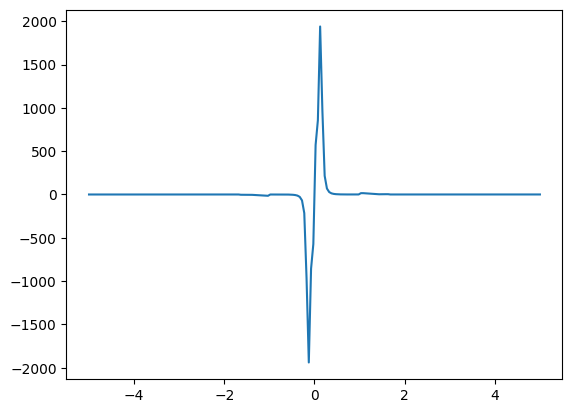

In [15]:
Ds_a = [re + 1j*im + 1j*eps*np.sign(om) for im,re,om in zip(Impp, Repp, omrange)]
result = [-2 * np.imag(-G / (1 - G * d)) for d in Ds_a]
plt.plot(omrange, result)


# Plotting ImPi and minima of SF wrt omega at diff widths

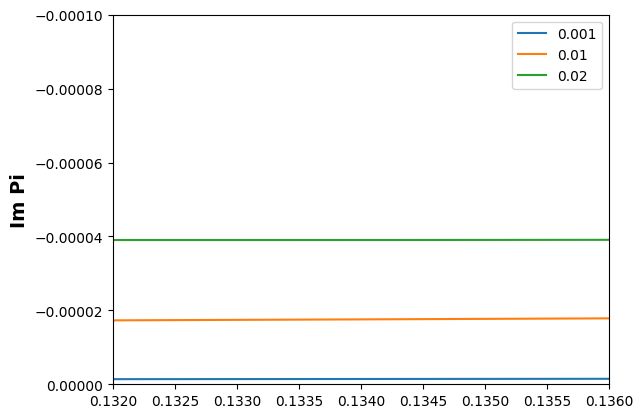

In [28]:
plt.plot(omrange1, F_array_1, label = '0.001')
plt.plot(omrange1, F_array_2,label = '0.01')
plt.plot(omrange1, F_array_3,label = '0.02')
plt.ylabel('Im Pi', fontsize=14, fontweight='bold')
plt.xlim(0.132,0.136)
plt.ylim(0, -0.0001)
plt.legend()
plt.show()


## Hatsuda Integral with interpolator

In [30]:
def G(p0,p,m,eps=0.05):
    return 1/( p0**2 - p**2 - m**2 + 1j*eps*np.sign(p0))

p0range = np.linspace(-1.641,1.641,550)
prange = np.linspace(0,0.651,350)
ImG = [G(s,0,0.5) for s in p0range]

In [31]:
G_array = np.array([[G(p0,p,0.325) for p in prange] for p0 in p0range])
new_ImG = tm.Interpolator2D(prange,p0range,np.ascontiguousarray(np.imag(G_array)))

In [32]:
ImPi =[tm.imag_pi_inter1(s,0.05, 0.325, 0.651, new_ImG) for s in tqdm.tqdm_notebook(omrange)]  

/tmp/ipykernel_730555/3536651773.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  ImPi =[tm.imag_pi_inter1(s,0.05, 0.325, 0.651, new_ImG) for s in tqdm.tqdm_notebook(omrange)]


  0%|          | 0/200 [00:00<?, ?it/s]

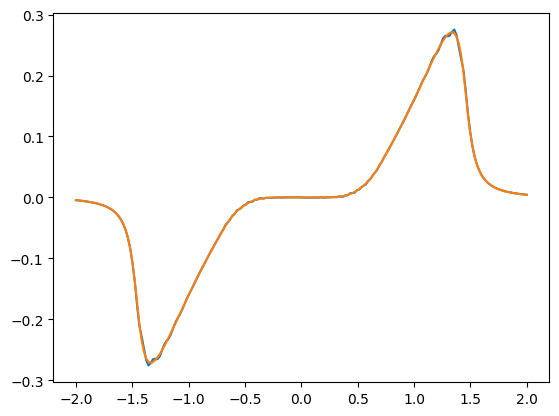

In [33]:
plt.plot(omrange, ImPi)
plt.plot(omrange, F_array_3)

In [34]:
iImPi = tm.Interpolator(omrange,  np.ascontiguousarray(ImPi), 'cubic')
RePi = np.array([tm.Re_meson(i,lambda4, iImPi) for i in omrange])
RePi = np.array(RePi)

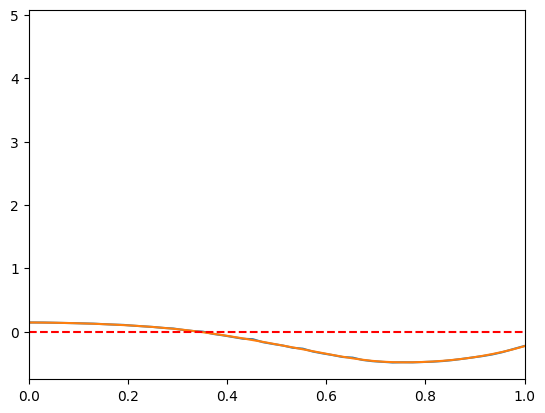

In [35]:
plt.plot(omrange, 1 - 10.08*RePi)
plt.plot(omrange, 1-10.08*Real_array_3)
plt.xlim(0,1)
plt.axhline(0, color='red', linestyle='--')